"Twitter Sentiment Analysis using NLP – A Case Study on US Airlines"

🎯 Project Objective
To analyze public sentiment towards major U.S. airlines by leveraging Twitter data. This project applies advanced Natural Language Processing (NLP) 
techniques to clean and preprocess social media text, extract sentiment scores using TextBlob and VADER, and visualize sentiment trends, word patterns, 
and airline-specific feedback. The goal is to uncover insights into customer opinions, identify service pain points, 
and demonstrate the power of NLP in social media analytics.

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('punkt')


In [5]:
# Import required libraries
import pandas as pd

# Load dataset
df = pd.read_csv("Twitter US Airline Sentiment.csv")

# Display structure
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
# Import required libraries
import re                                # for regex-based text cleaning
import string                            # for handling punctuation
from nltk.corpus import stopwords        # for removing common stopwords
from nltk.stem import WordNetLemmatizer  # for lemmatizing words (reducing to base form)


In [7]:
# Load stopwords and initialize lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define text cleaning function
def clean_text(text):
    text = str(text).lower()  # 🔻 Convert to lowercase for uniformity

    #  Remove URLs (e.g., http://, https://)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    #  Remove mentions (@user) and hashtags (#hashtag)
    text = re.sub(r'@\w+|#\w+', '', text)

    #  Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    #  Tokenize text (split into words)
    tokens = text.split()

    #  Remove stopwords & lemmatize each token
    cleaned_tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words
    ]

    #  Join tokens back into single string
    return ' '.join(cleaned_tokens)

In [ ]:
#  Apply cleaning to each tweet in the 'text' column
df['clean_text'] = df['text'].apply(clean_text)

#  Preview original vs. cleaned tweet
df[['text', 'clean_text']].head()


,text,clean_text
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,didnt today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,really big bad thing


In [ ]:
from textblob import TextBlob

#  Apply TextBlob to get polarity score (-1 to 1)
df['textblob_polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

#  Classify sentiment based on polarity
def get_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['textblob_sentiment'] = df['textblob_polarity'].apply(get_sentiment)


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#  Initialize VADER
vader = SentimentIntensityAnalyzer()

#  Apply VADER to get compound score
df['vader_compound'] = df['clean_text'].apply(lambda x: vader.polarity_scores(x)['compound'])

#  Classify VADER sentiment
df['vader_sentiment'] = df['vader_compound'].apply(get_sentiment)


In [11]:
df[['clean_text', 'textblob_polarity', 'textblob_sentiment', 'vader_compound', 'vader_sentiment']].head()


,clean_text,textblob_polarity,textblob_sentiment,vader_compound,vader_sentiment
0,said,0.00000,Neutral,0.0000,Neutral
1,plus youve added commercial experience tacky,0.00000,Neutral,0.0000,Neutral
2,didnt today must mean need take another trip,-0.31250,Negative,0.0000,Neutral
3,really aggressive blast obnoxious entertainmen...,0.00625,Positive,-0.3306,Negative
4,really big bad thing,-0.35000,Negative,-0.5829,Negative


In [21]:
# Select the important columns to save
df_export = df[['tweet_id', 'airline', 'tweet_created', 'text', 'clean_text', 
                'textblob_polarity', 'textblob_sentiment', 
                'vader_compound', 'vader_sentiment']]

# Save as CSV
df_export.to_csv("cleaned_tweets.csv", index=False)

print(" cleaned_tweets.csv exported successfully!")


 cleaned_tweets.csv exported successfully!


C:\Users\ronak\AppData\Local\Temp\ipykernel_19792\779823932.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='vader_sentiment', palette='pastel')


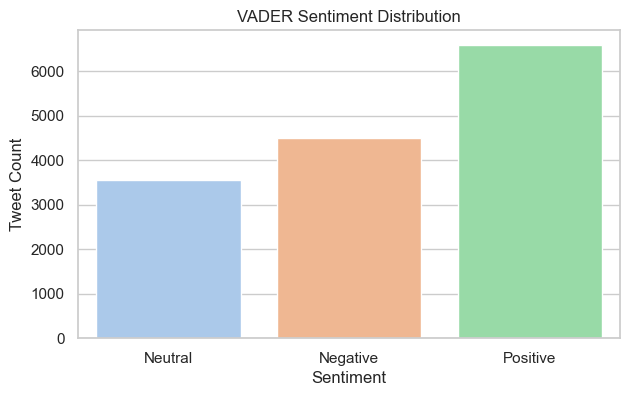

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Countplot for VADER sentiment
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='vader_sentiment', palette='pastel')
plt.title("VADER Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


C:\Users\ronak\AppData\Local\Temp\ipykernel_19792\3132245670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='textblob_sentiment', palette='Blues', ax=axes[0])
C:\Users\ronak\AppData\Local\Temp\ipykernel_19792\3132245670.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='vader_sentiment', palette='Oranges', ax=axes[1])


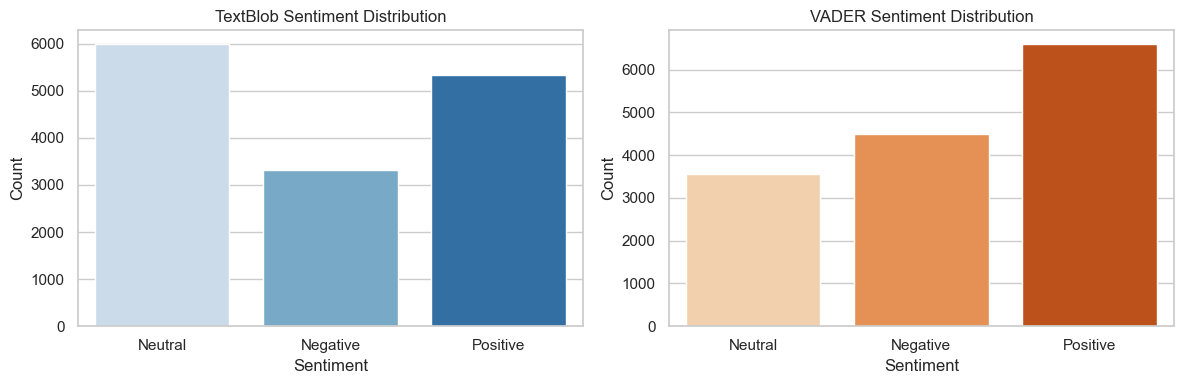

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# TextBlob
sns.countplot(data=df, x='textblob_sentiment', palette='Blues', ax=axes[0])
axes[0].set_title("TextBlob Sentiment Distribution")
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Count")

# VADER
sns.countplot(data=df, x='vader_sentiment', palette='Oranges', ax=axes[1])
axes[1].set_title("VADER Sentiment Distribution")
axes[1].set_xlabel("Sentiment")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.savefig("images/vader_distribution.png")
plt.show()


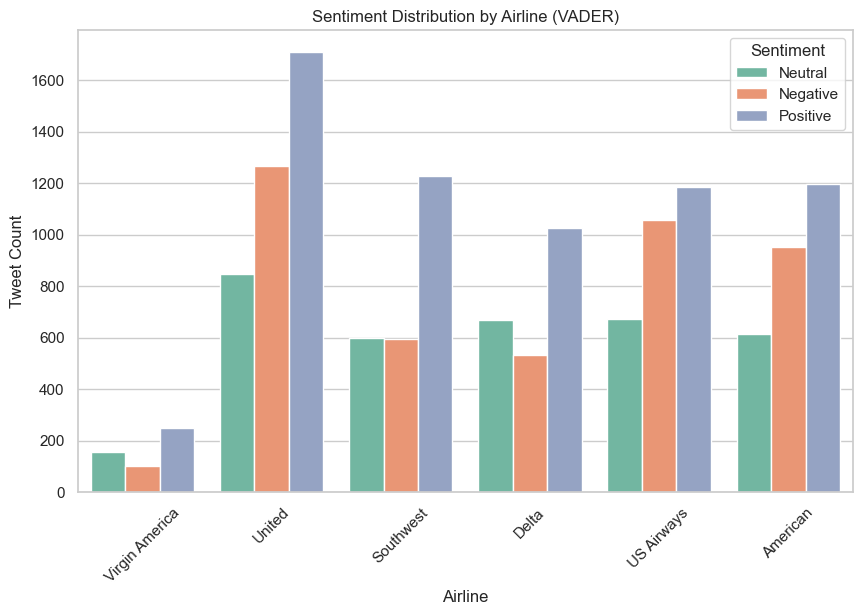

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='airline', hue='vader_sentiment', palette='Set2')
plt.title("Sentiment Distribution by Airline (VADER)")
plt.xlabel("Airline")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()


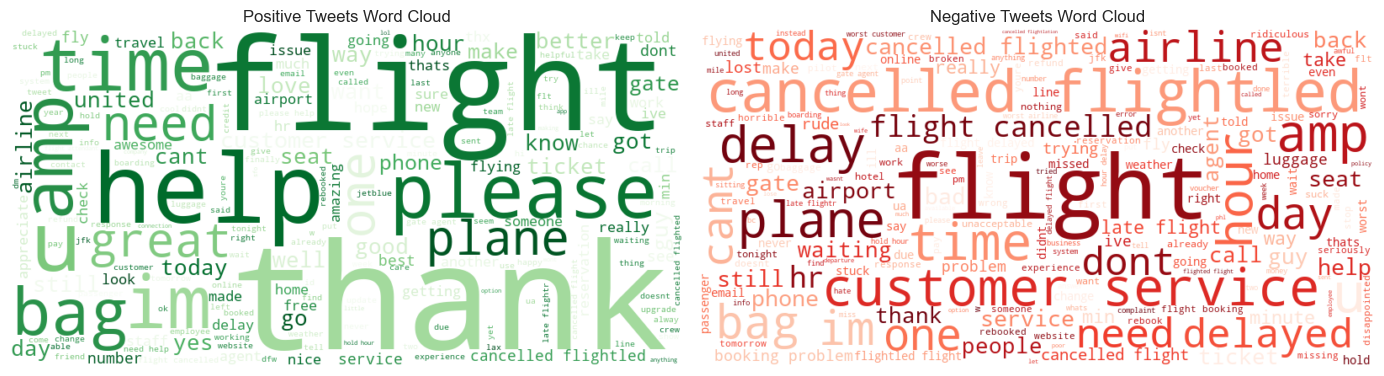

In [18]:
from wordcloud import WordCloud

# Combine all positive and negative tweets
positive_words = ' '.join(df[df['vader_sentiment'] == 'Positive']['clean_text'])
negative_words = ' '.join(df[df['vader_sentiment'] == 'Negative']['clean_text'])

# Generate Word Clouds
plt.figure(figsize=(14, 6))

# Positive WordCloud
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_words)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Positive Tweets Word Cloud")
plt.axis('off')

# Negative WordCloud
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_words)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Negative Tweets Word Cloud")
plt.axis('off')

plt.tight_layout()
plt.savefig("images/wordcloud.png")
plt.show()


In [16]:
# Convert tweet_created to datetime format
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# Extract just the date part (optional)
df['tweet_date'] = df['tweet_created'].dt.date


C:\Users\ronak\AppData\Local\Temp\ipykernel_19792\346203366.py:13: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

C:\Users\ronak\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


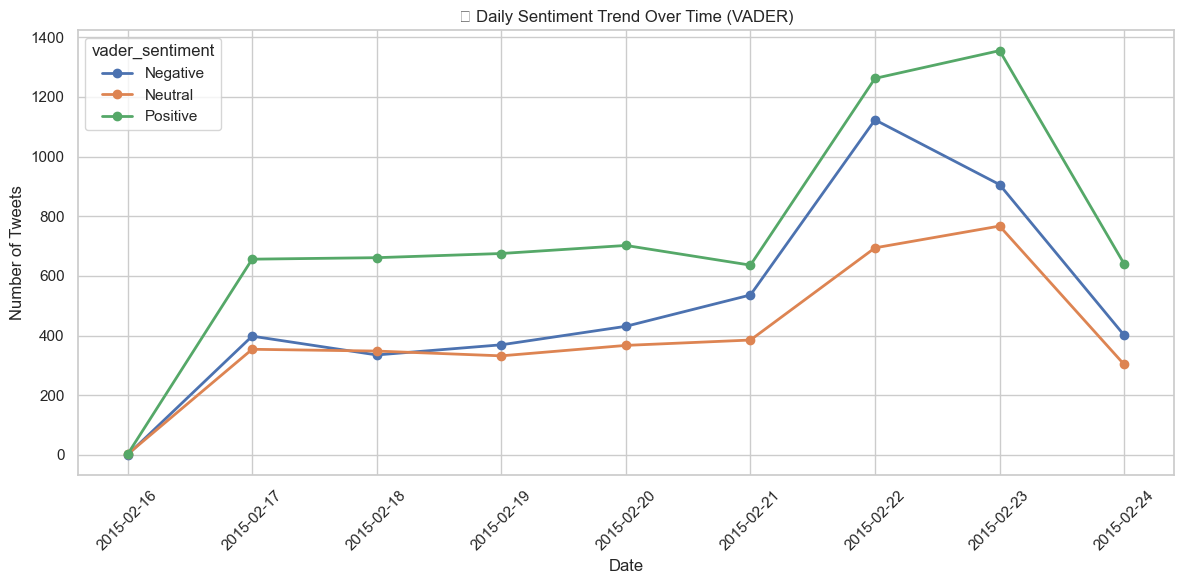

In [17]:
# Group by date and sentiment
sentiment_over_time = df.groupby(['tweet_date', 'vader_sentiment']).size().unstack().fillna(0)

# Plot
plt.figure(figsize=(12, 6))
sentiment_over_time.plot(kind='line', marker='o', figsize=(12, 6), linewidth=2)

plt.title("📆 Daily Sentiment Trend Over Time (VADER)")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Thank You!